In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_excel("chioso_val_dataset/chioso_synthetic_dataset_report.ods")

In [3]:
df = df.loc[(df["label"]!="macro") & (df["label"]!="weighted")]
df

,run,dropout,label,precision,recall,f1-score,support,unit
0,1,0.0,1,0.84,0.90,0.87,13515500,pixel
1,1,0.0,2,0.84,0.75,0.80,9244000,pixel
2,1,0.0,3,0.77,0.77,0.77,973000,pixel
3,1,0.0,accuracy,NaN,NaN,0.84,23732500,pixel
6,1,0.0,1,0.94,0.97,0.96,79000,cell
...,...,...,...,...,...,...,...,...
123,2,0.8,accuracy,NaN,NaN,0.73,23732500,pixel
126,2,0.8,1,0.80,0.89,0.84,79000,cell
127,2,0.8,2,0.81,0.71,0.76,54000,cell
128,2,0.8,3,0.88,0.64,0.74,5500,cell


In [4]:
dfa = pd.melt(df, id_vars=['run', "dropout", "label", "support", "unit"], value_vars=['precision', "recall", "f1-score"])
dfa

,run,dropout,label,support,unit,variable,value
0,1,0.0,1,13515500,pixel,precision,0.84
1,1,0.0,2,9244000,pixel,precision,0.84
2,1,0.0,3,973000,pixel,precision,0.77
3,1,0.0,accuracy,23732500,pixel,precision,NaN
4,1,0.0,1,79000,cell,precision,0.94
...,...,...,...,...,...,...,...
265,2,0.8,accuracy,23732500,pixel,f1-score,0.73
266,2,0.8,1,79000,cell,f1-score,0.84
267,2,0.8,2,54000,cell,f1-score,0.76
268,2,0.8,3,5500,cell,f1-score,0.74


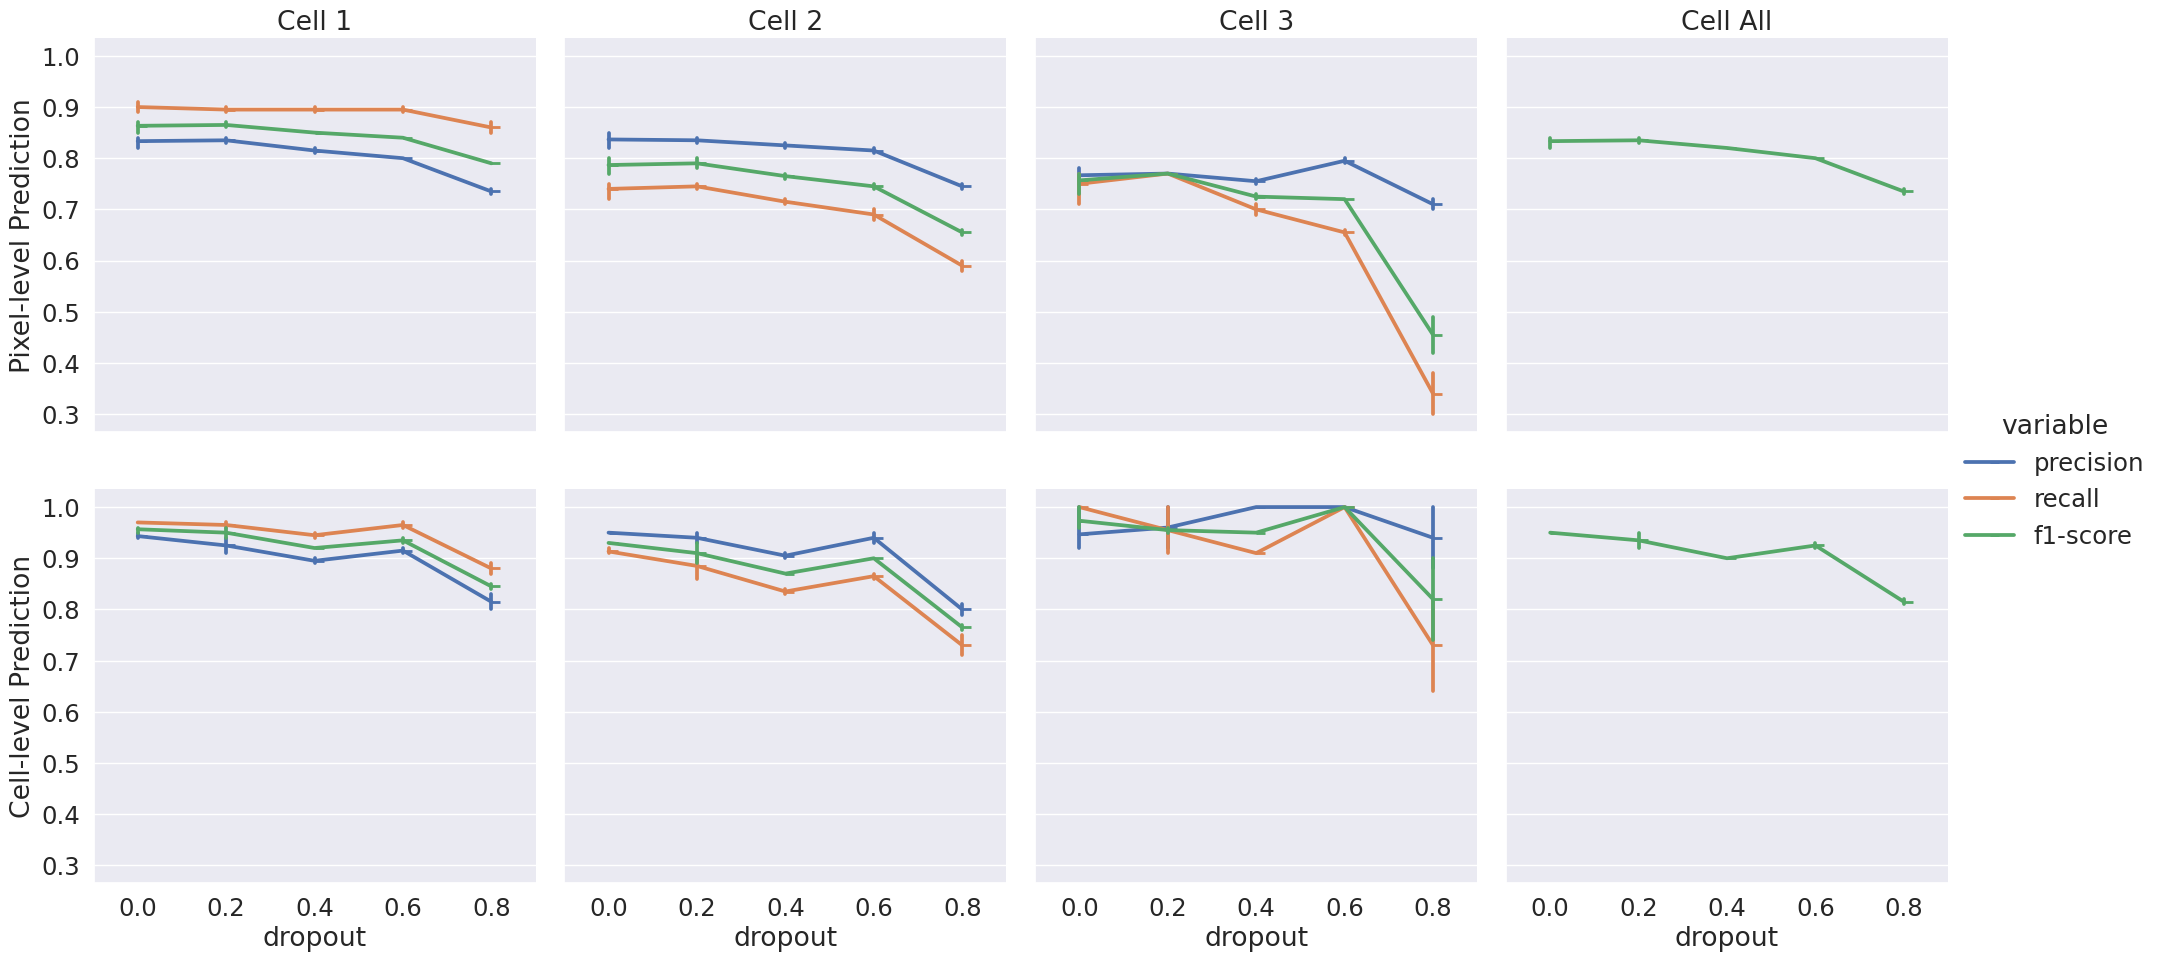

In [27]:
import matplotlib.pyplot as plt
data = dfa.loc[dfa["label"]!="avg"]
# g = sns.FacetGrid(data, col='label', row="unit")
# g = g.map(sns.scatterplot, x='dropout', y='value', hue="variable")
# g = g.map(sns.lineplot, x='dropout', y='value', hue="variable")

sns.set(font_scale=1.6) 
g = sns.catplot(data, x='dropout', y='value', hue="variable", col="label", row="unit", kind="point", marker=True)

titles = ["Cell 1", "Cell 2", "Cell 3", "Cell All"]
for ax, t in zip(g.axes.flatten(), titles + [""]*4):
    ax.set_title(t)

g.axes[0,0].set_ylabel("Pixel-level Prediction")
g.axes[1,0].set_ylabel("Cell-level Prediction")

plt.savefig("dropout.png")